[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/SatCloP/pyrtlib/blob/main/docs/source/notebook/first_run.ipynb)

# My first test with PyRTlib

Installing PyRTlib via pip. Note that the following command will also install all requirements to execute properly PyRTlib package. It is possible to test development version by installing the package directly from github repository.
```console
!pip install https://github.com/SatCloP/pyrtlib/archive/refs/heads/dev.zip
```

In [1]:
!pip install pyrtlib

Defaulting to user installation because normal site-packages is not writeable


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/251.7 kB ? eta -:--:--

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.7/251.7 kB 18.0 MB/s eta 0:00:00


Import necessary packages to perform and plotting your first spectrum in PyRTlib.

In [2]:
# This requires jupyter-matplotlib a.k.a. ipympl.
# ipympl can be install via pip or conda.
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
import numpy as np

Load standard climnatology and utils functions necessary to run the code.

In [3]:
from pyrtlib.absorption_model import O2AbsModel
from pyrtlib.climatology import AtmosphericProfiles as atmp
from pyrtlib.tb_spectrum import TbCloudRTE
from pyrtlib.utils import ppmv2gkg, mr2rh

The following code allows to performing spectra for one typical climatologies (Tropical) at 90° elevation angles. Please refer to the PyRTlib documentation for more details on how to use the library.

In [4]:
z, p, _, t, md = atmp.gl_atm(atmp.TROPICAL)

gkg = ppmv2gkg(md[:, atmp.H2O], atmp.H2O)
rh = mr2rh(p, t, gkg)[0] / 100

frq = np.arange(20, 1001, 1)

rte = TbCloudRTE(z, p, t, rh, frq)
rte.init_absmdl('R22SD')
O2AbsModel.model = 'R22'
O2AbsModel.set_ll()
df = rte.execute()
df = df.set_index(frq)

Plotting zenith upwelling brigthness temperature.

<Axes: xlabel='Frequency [GHz]', ylabel='Brightness Temperature [K]'>

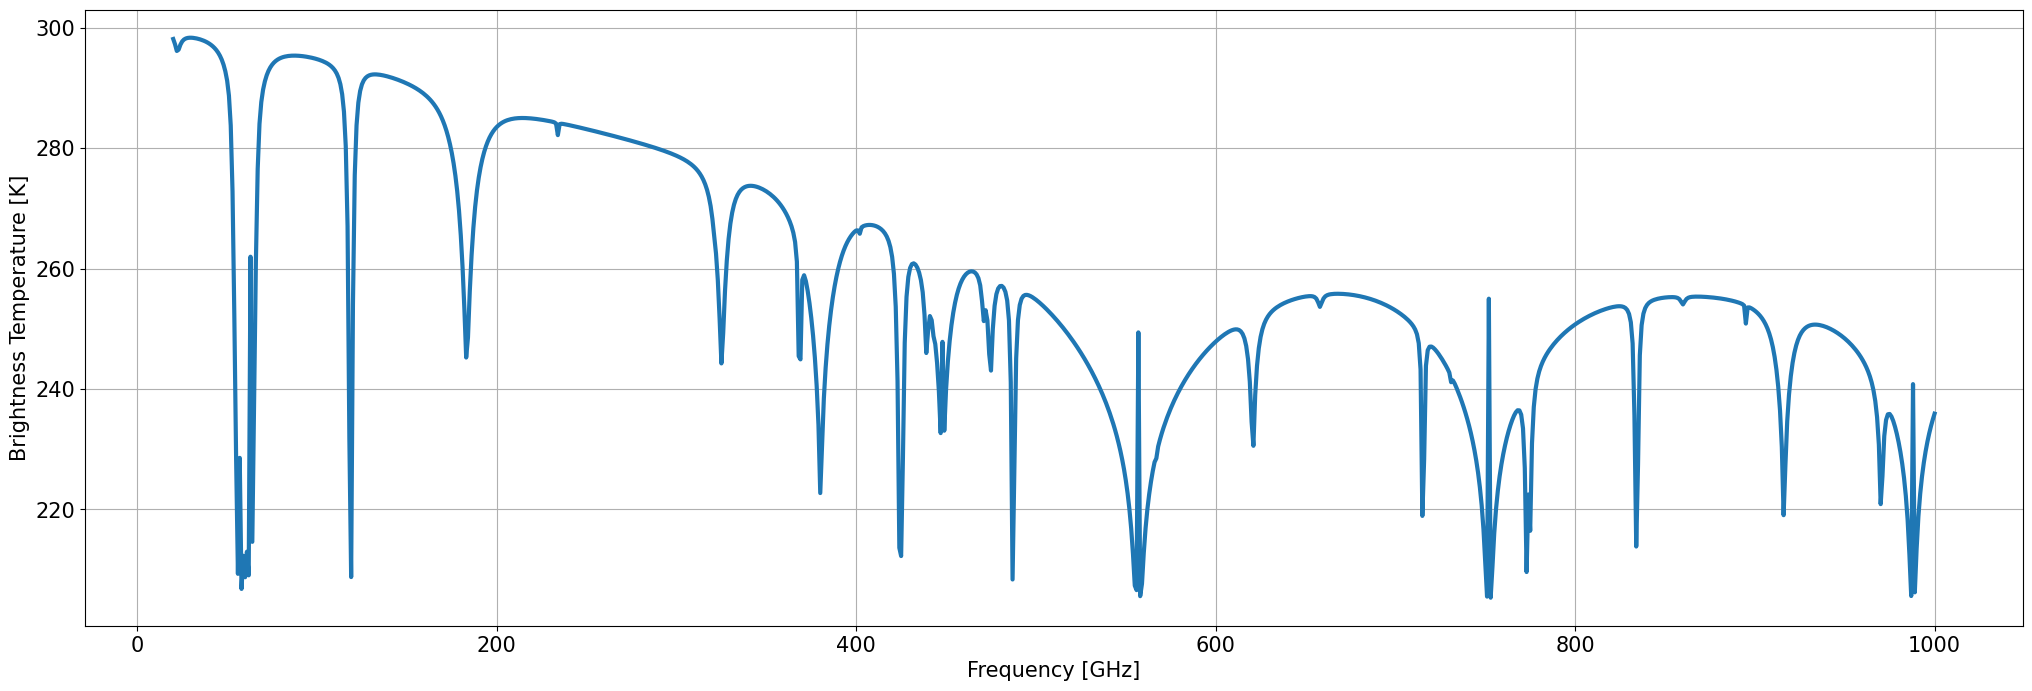

In [5]:
df.tbtotal.plot(figsize=(25, 8), linewidth=3, xlabel="Frequency [GHz]", ylabel="Brightness Temperature [K]", grid=True)